# Project Name  :  Heart Disease Prediction 

# Team Member : RAMDAYAL(20103119) 

# 

In [2]:
#import useful python library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
#data collection and processing
data=pd.read_csv("heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
#checking dataframe shape
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#statistical measure
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [9]:
X=data.iloc[:,:-1]
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [10]:
Y=data.iloc[:,-1]
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


# split the data for  training and testing purpose

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [12]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


# with the help of this histogram we can easily observe the distribution of different attributes. This plot help us to identify the categorical data. here we can see that sex ,cp,fbs,thal or target etc are categorical type data.


C:\Users\ramdayal\AppData\Local\Temp/ipykernel_9936/156798760.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax,bins=30)


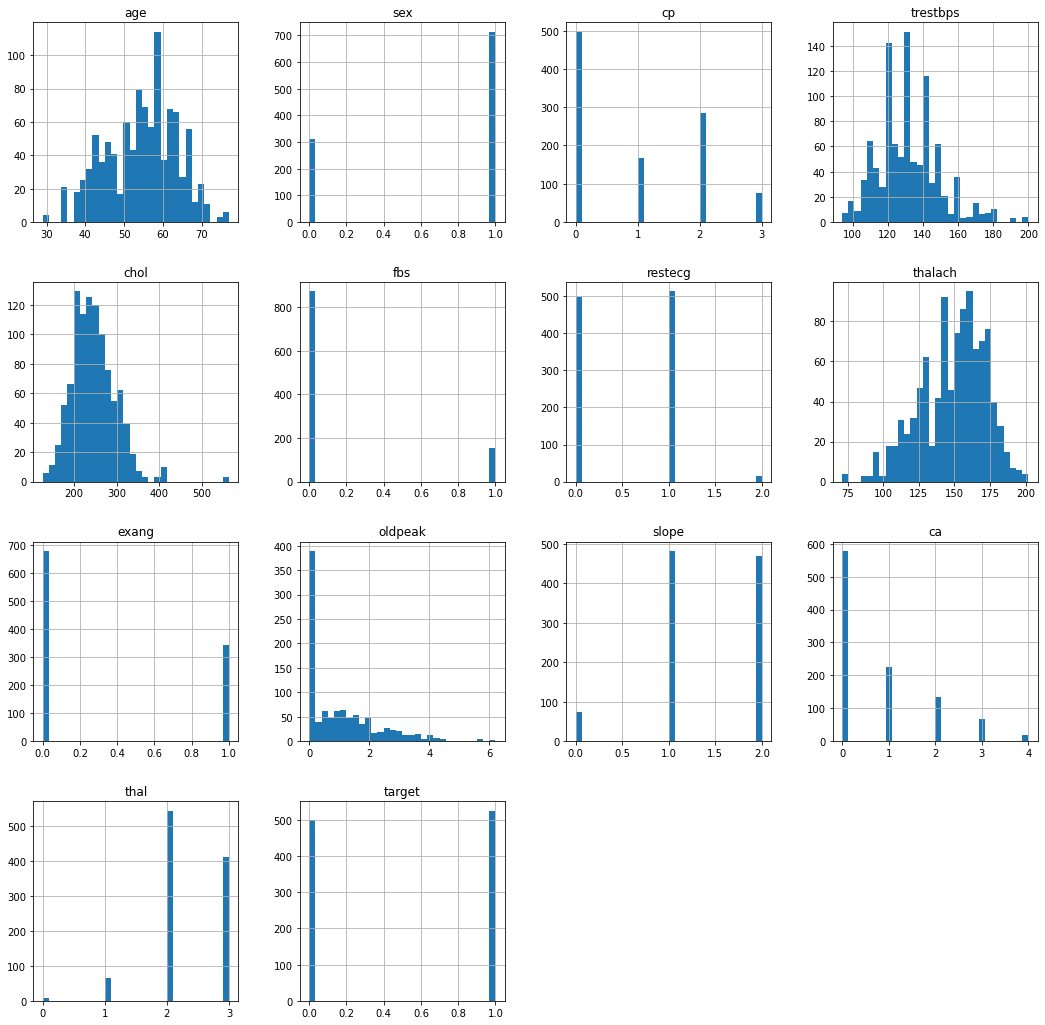

In [13]:
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
data.hist(ax=ax,bins=30)
plt.show()

# This heatmap /  corrilation matrix shows that if correlation coefficient of each feature with respect to another feature is less than 0.5/0.6 than no multicollinearity in the dataset.

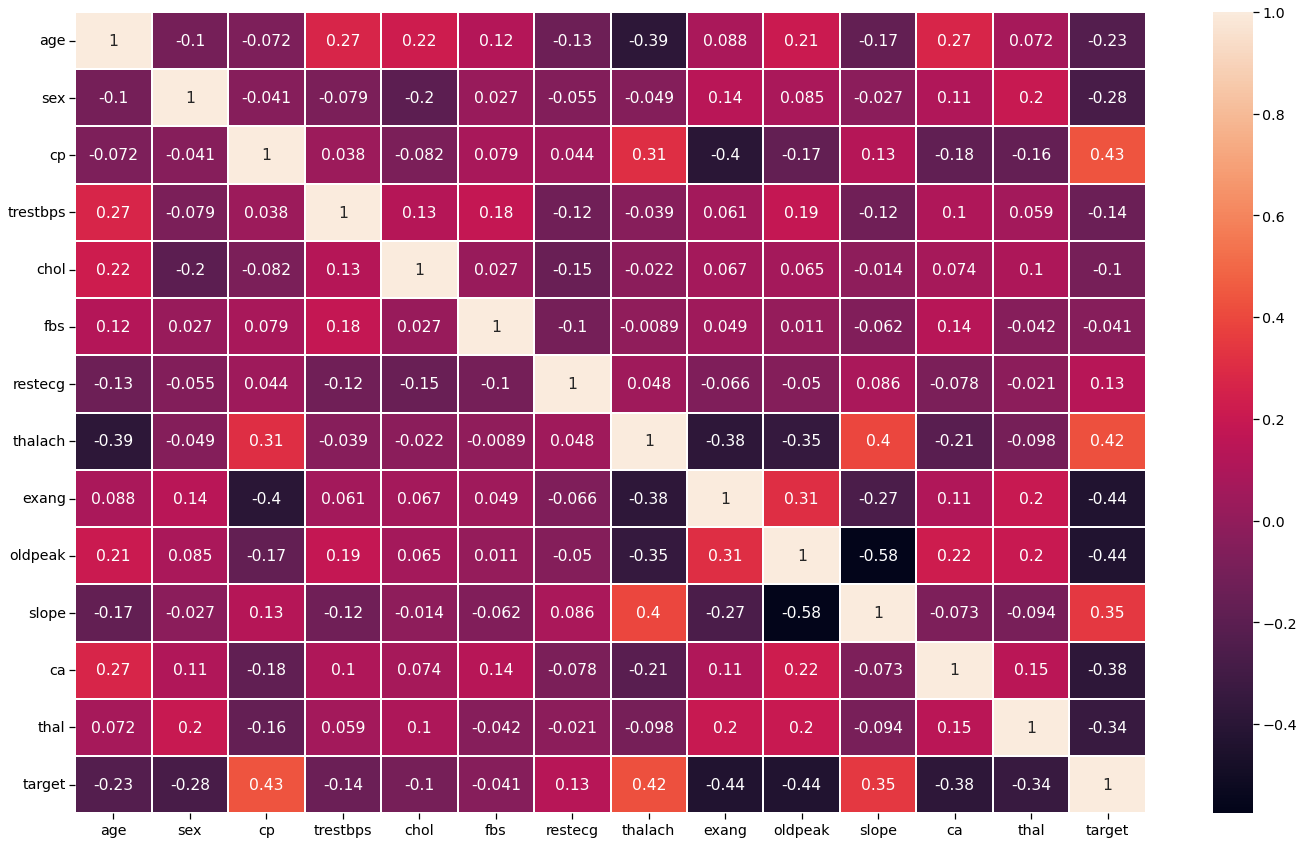

In [14]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

# logistic regression model (classification model)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [20]:
#train the model with training data
model.fit(X_train,Y_train)

C:\Users\ramdayal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# model eval.  accuracy score of training data

In [15]:
X_train_predicition = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predicition,Y_train)
print( "accuracy of traing data : " ,training_data_accuracy)


accuracy of traing data :  0.8524390243902439


# accuracy score of testing data

In [16]:
X_test_predicition = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predicition,Y_test)
print("accuracy of testing data : ",testing_data_accuracy)

accuracy of testing data :  0.8048780487804879


# build predictive system

In [17]:
input_data=(50,0,1,120,244,0,1,162,0,1.1,2,0,2)
input_data_np_array = np.asarray(input_data)
reshaped_data = input_data_np_array.reshape(1,-1)

predicition = model.predict(reshaped_data)

print(predicition)

if(predicition[0]==0):
    print("The Person does not have a heart disease ")
else:
    print("The Person has heart disease")


[1]
The Person has heart disease


In [18]:
#build predictive system
input_data=(54,1,0,124,266,0,0,109,1,2.2,1,1,3)
input_data_np_array = np.asarray(input_data)
reshaped_data = input_data_np_array.reshape(1,-1)

predicition = model.predict(reshaped_data)

print(predicition)

if(predicition[0]==0):
    print("The Person does not have a heart disease ")
else:
    print("The Person has heart disease")

[0]
The Person does not have a heart disease 


# scatter plot of maximum heart rate v/s age

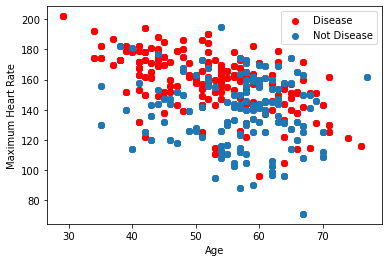

In [19]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# This Plot showing Heart Disease Frequency for sex

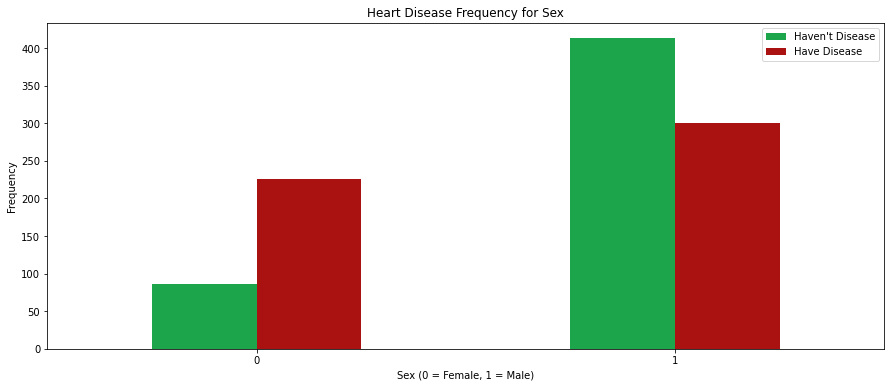

In [20]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA54B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# This Plot showing Heart Disease Frequency according to FBS(fasting blood sugar ).

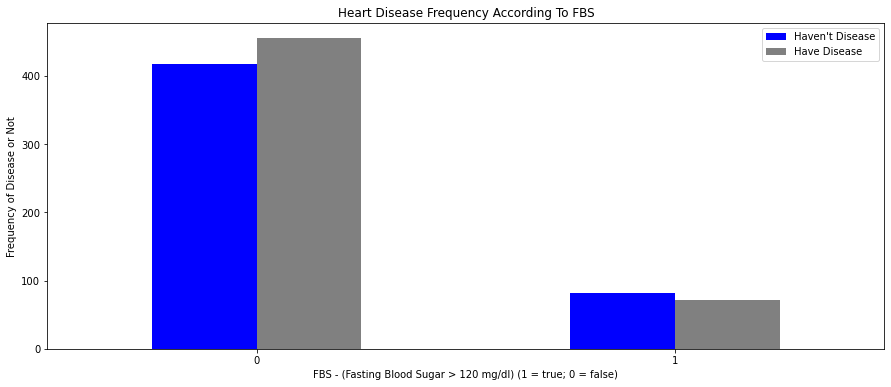

In [21]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['blue','gray' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

# This Plot showing Heart Disease Frequency according to Chest Pain Type.

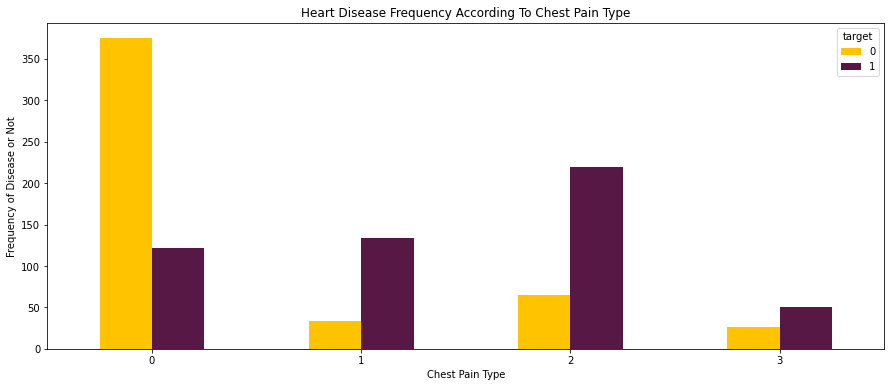

In [22]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# This plot shows the correlation with the target feature.In this plot Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature. Other features are negatively correlated with the target feature.

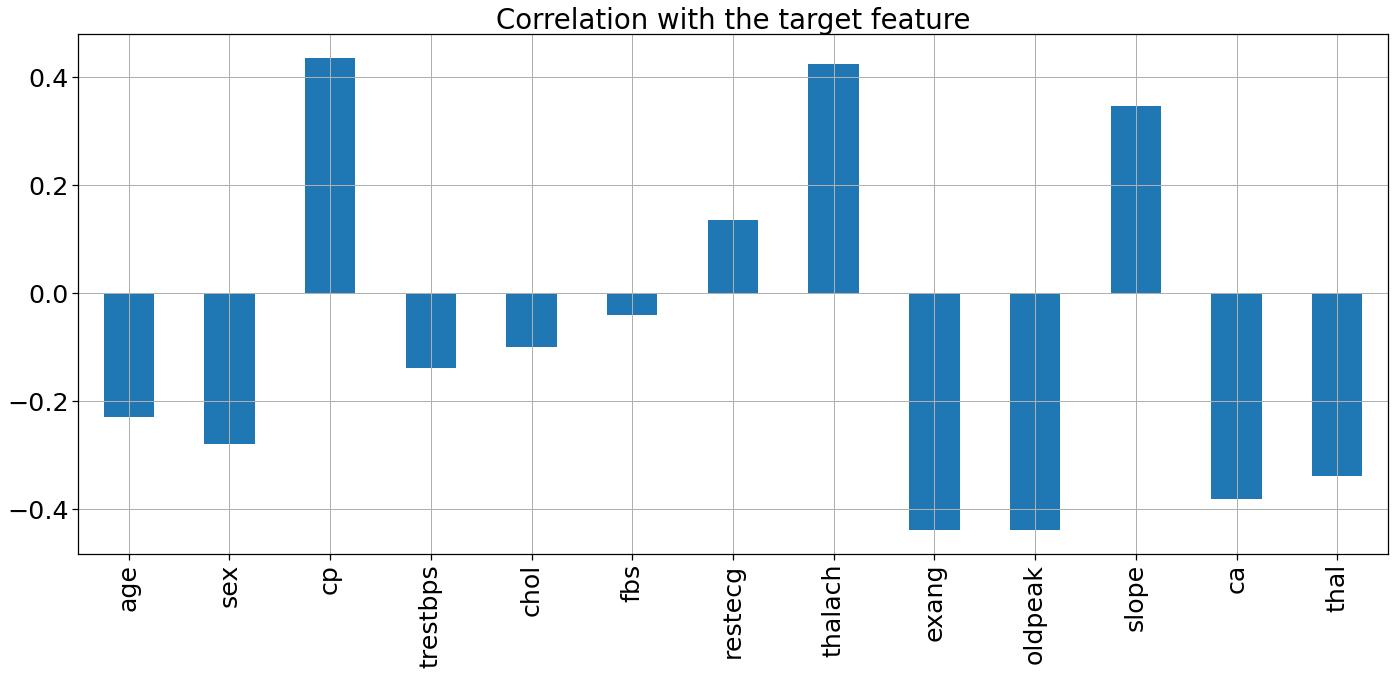

In [23]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                       title="Correlation with the target feature")
plt.tight_layout()

In [24]:
#defining all age stages 
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

# Here In This Pie chart we can see that elder people are the most affected by heart disease and young ones are the least affected

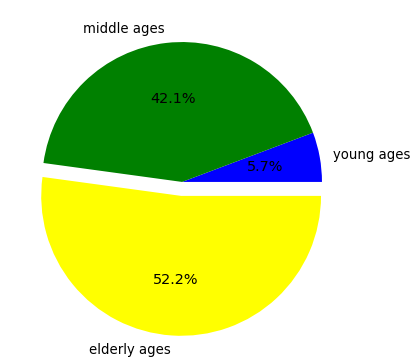

In [25]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, 
        autopct='%1.1f%%')
plt.tight_layout()